In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import minmax_scale
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

def getexcel (filepath, sheetname):
    df=pd.read_excel(filepath,sheetname)
    return df

df_train=getexcel('d:\\Bob xie\work\Dataset\\Ramaxel\\Sum for features\\train_sum_20200715.xlsx','Sheet1')
df_verify=getexcel('d:\\Bob xie\work\Dataset\\Ramaxel\\Sum for features\\verify_sum_20200715.xlsx','Sheet1')
df_Verify=getexcel('d:\\Bob xie\work\Dataset\\Ramaxel\\Verify data_20200905.xlsx','result')

df_combin=df_train.append(df_verify)

namelst=[]
for col in df_train.columns:
    namelst.append(col)

for col in df_train.columns:
    if 'sum' in col:
        namelst.remove(col)
        

namelst.remove('Unnamed: 0')
namelst.remove('lenovoprovided_x')


x=df_combin[namelst]
y=df_combin['lenovoprovided_x']


#df_Verify.dropna(axis=0,inplace=True)
x_verify=df_Verify[namelst]
y_verify=df_Verify['lenovoprovided_x']

In [27]:
def fillna_withcolumnmean(df):
    lst=df.columns[df.isna().any()].tolist()
    for name in lst:
        df[name].fillna(df[name].mean(),inplace=True)
    return df

x_verify=fillna_withcolumnmean(x_verify)

In [28]:
from imblearn.over_sampling import SMOTE
x_resampled_smote, y_resampled_smote = SMOTE().fit_sample(x, y)

x_train,x_test,y_train,y_test=train_test_split(x_resampled_smote,y_resampled_smote,test_size=0.2,random_state=100)

x_train = minmax_scale(x_train)
x_test =  minmax_scale(x_test)
x_verify=minmax_scale(x_verify)

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

abc=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=3,
    min_samples_split=6,
    min_samples_leaf=5,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight={0:1,1:1},
    presort=False,)

ABC=AdaBoostClassifier(base_estimator=abc,
    n_estimators=1000,
    learning_rate=0.1,
    algorithm='SAMME.R',
    random_state=0,
)
ABC.fit(x_train,y_train)

LGBM=LGBMClassifier(boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=1000,
    subsample_for_bin=200000,
    objective=None,
    class_weight={0:1,1:1},
    min_split_gain=0.0,
    min_child_weight=0.001,
    min_child_samples=20,
    subsample=0.8,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=0,
    n_jobs=-1,
    silent=True,
    importance_type='split',
)
LGBM.fit(x_train,y_train)

GBM=GradientBoostingClassifier(loss='deviance',
    learning_rate=0.1,
    n_estimators=1000,
    subsample=0.5,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=0,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='auto',
)
GBM.fit(x_train,y_train)

LR = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight={0:1,1:1},
    random_state=0,
    solver='liblinear',
    max_iter=1000,
    multi_class='ovr',
    verbose=0,
    warm_start=False,
    n_jobs=1,
)
LR.fit(x_train,y_train)

svc = SVC(
    probability=True,
    C=1.0,
    kernel='sigmoid',
    degree=3,
    gamma='auto',
    coef0=0.0,
    shrinking=True,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    random_state=None,
)
svc.fit(x_train,y_train)

DT = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=6,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight={0:1,1:1},
    presort=False,
)
DT.fit(x_train,y_train)

RF = RandomForestClassifier(
    n_estimators=1000,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight={0:1,1:1},
)
RF.fit(x_train,y_train)

XGB = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=1000,
    verbosity=1,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
)
XGB.fit(x_train,y_train)

XGBClassifier(n_estimators=1000)

In [30]:
from sklearn.metrics import precision_score, roc_curve, recall_score, f1_score, roc_auc_score, accuracy_score
models = [ABC,RF,XGB,LGBM,LR,svc,DT,GBM]

names = ['ABC','RF','XBG','LGBM','LR','SVC','DT','GBM']
evaluates = ['accuracy','precision','recall','f1','auc']

df_list = []
for name, model in zip(names, models):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_verify_pred=model.predict(x_verify)

    # accuracy
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    verify_accuracy=model.score(x_verify,y_verify)
    
    # precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    verify_precision=precision_score(y_verify,y_verify_pred)
    
    # recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    verify_recall= recall_score(y_verify,y_verify_pred)
    
    # f1
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    verify_f1=f1_score(y_verify,y_verify_pred)
    
    # auc 
    y_train_pred = model.predict_proba(x_train)[:, 1]
    y_test_pred = model.predict_proba(x_test)[:, 1]
    y_verify_pred=model.predict_proba(x_verify)[:,1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    verify_auc=roc_auc_score(y_verify,y_verify_pred)
    
#     print('{}  训练集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name, train_accuracy,
#                                                                                               train_precision,
#                                                                                               train_recall, train_f1,
#                                                                                               train_auc))
#     print('{}  测试集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name, test_accuracy,
#                                                                                               test_precision,
#                                                                                               test_recall, test_f1,
#                                                                                               test_auc))
#     print('\n')
    df = pd.DataFrame(np.array(
        [train_accuracy, train_precision, train_recall, train_f1, train_auc, test_accuracy, test_precision, test_recall,
         test_f1, test_auc, verify_accuracy, verify_precision, verify_recall,verify_f1, verify_auc]).reshape(3, -1),
                      index=['train', 'test','verify'],
                      columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-Score'])
    df_list.append(df)

pd.concat(df_list, axis=0, keys=names)

Accuracy  Precision    Recall  F1-Score  AUC-Score
ABC  train   0.998777   0.998779  0.998779  0.998779   0.999997
     test    0.650367   0.941176  0.315271  0.472325   0.875604
     verify  0.471698   0.000000  0.000000  0.000000   0.507123
RF   train   0.779205   0.796632  0.750916  0.773099   0.870245
     test    0.667482   0.666667  0.660099  0.663366   0.730714
     verify  0.471698   0.466667  0.259259  0.333333   0.552707
XBG  train   0.998777   0.997564  1.000000  0.998780   0.999997
     test    0.797066   0.894737  0.669951  0.766197   0.901310
     verify  0.509434   0.600000  0.111111  0.187500   0.629630
LGBM train   0.998777   0.998779  0.998779  0.998779   0.999997
     test    0.794621   0.934307  0.630542  0.752941   0.917356
     verify  0.490566   0.500000  0.037037  0.068966   0.645299
LR   train   0.696636   0.691578  0.711844  0.701564   0.764655
     test    0.608802   0.617486  0.556650  0.585492   0.673275
     verify  0.584906   0.608696  0.518519  0.560000   0.635328
SVC  train   0.635474   0.655944  0.572650  0.611473   0.659673
     test    0.594132   0.633094  0.433498  0.514620   0.591061
     verify  0.509434   0.529412  0.333333  0.409091   0.527066
DT   train   0.898471   0.865622  0.943834  0.903037   0.946232
     test    0.599022   0.581590  0.684729  0.628959   0.657707
     verify  0.490566   0.500000  0.370370  0.425532   0.482906
GBM  train   0.998777   0.998779  0.998779  0.998779   0.999997
     test    0.696822   0.915789  0.428571  0.583893   0.852145
     verify  0.490566   0.000000  0.000000  0.000000   0.527066

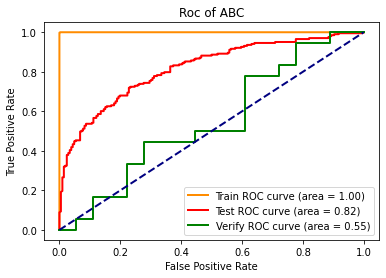

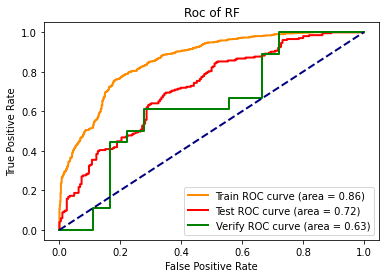

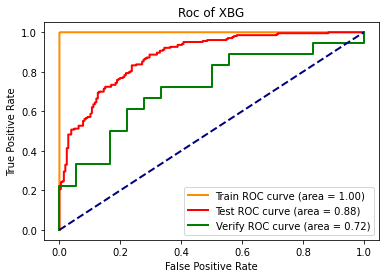

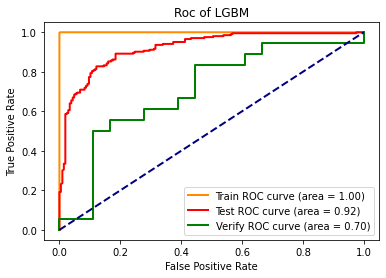

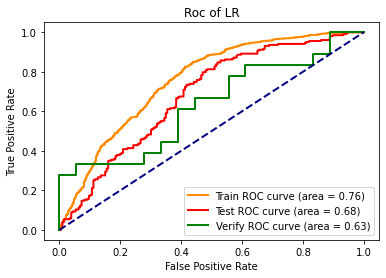

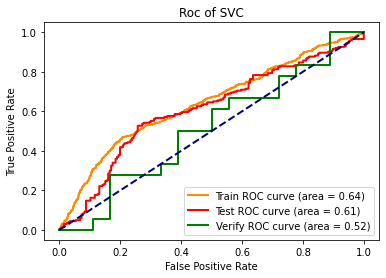

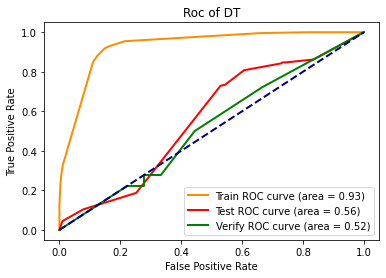

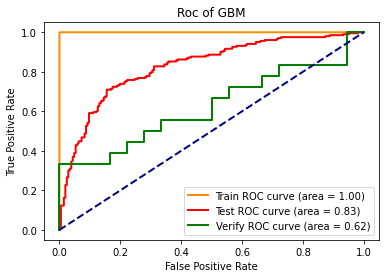

In [6]:
def draw_roc_curve(train_pre_proba, test_pre_proba, verify_pre_proba, train_auc, test_auc, verify_auc, model_name):
    fpr, tpr, roc_auc = train_pre_proba
    test_fpr, test_tpr, test_roc_auc = test_pre_proba
    verify_fpr, verify_tpr, verify_roc_auc = verify_pre_proba

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='Train ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='Test ROC curve (area = %0.2f)' % test_auc)
    plt.plot(verify_fpr, verify_tpr, color='green',
             lw=lw, label='Verify ROC curve (area = %0.2f)' % verify_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc of ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

for name, model in zip(names, models):
    y_train_pred = model.predict_proba(x_train)[:, 1]
    y_test_pred = model.predict_proba(x_test)[:, 1]
    y_verify_pred = model.predict_proba(x_verify)[:, 1]
    
    train_roc = roc_curve(y_train, y_train_pred)
    test_roc = roc_curve(y_test, y_test_pred)
    verify_roc = roc_curve(y_verify, y_verify_pred)
    
    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    verify_auc = roc_auc_score(y_verify, y_verify_pred)

    draw_roc_curve(train_roc, test_roc, verify_roc, train_auc, test_auc, verify_auc, name)

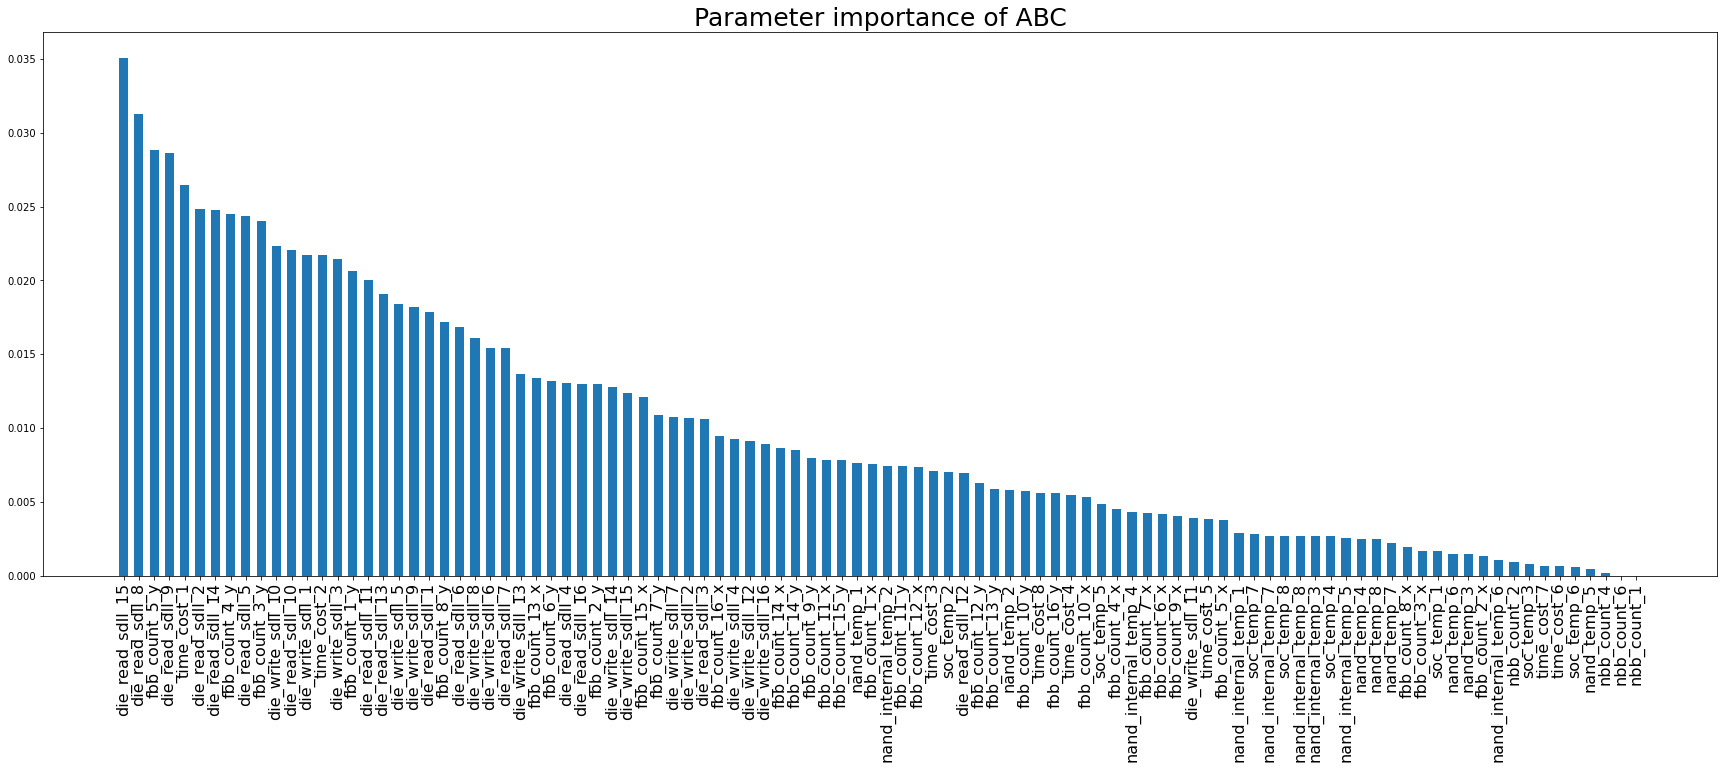

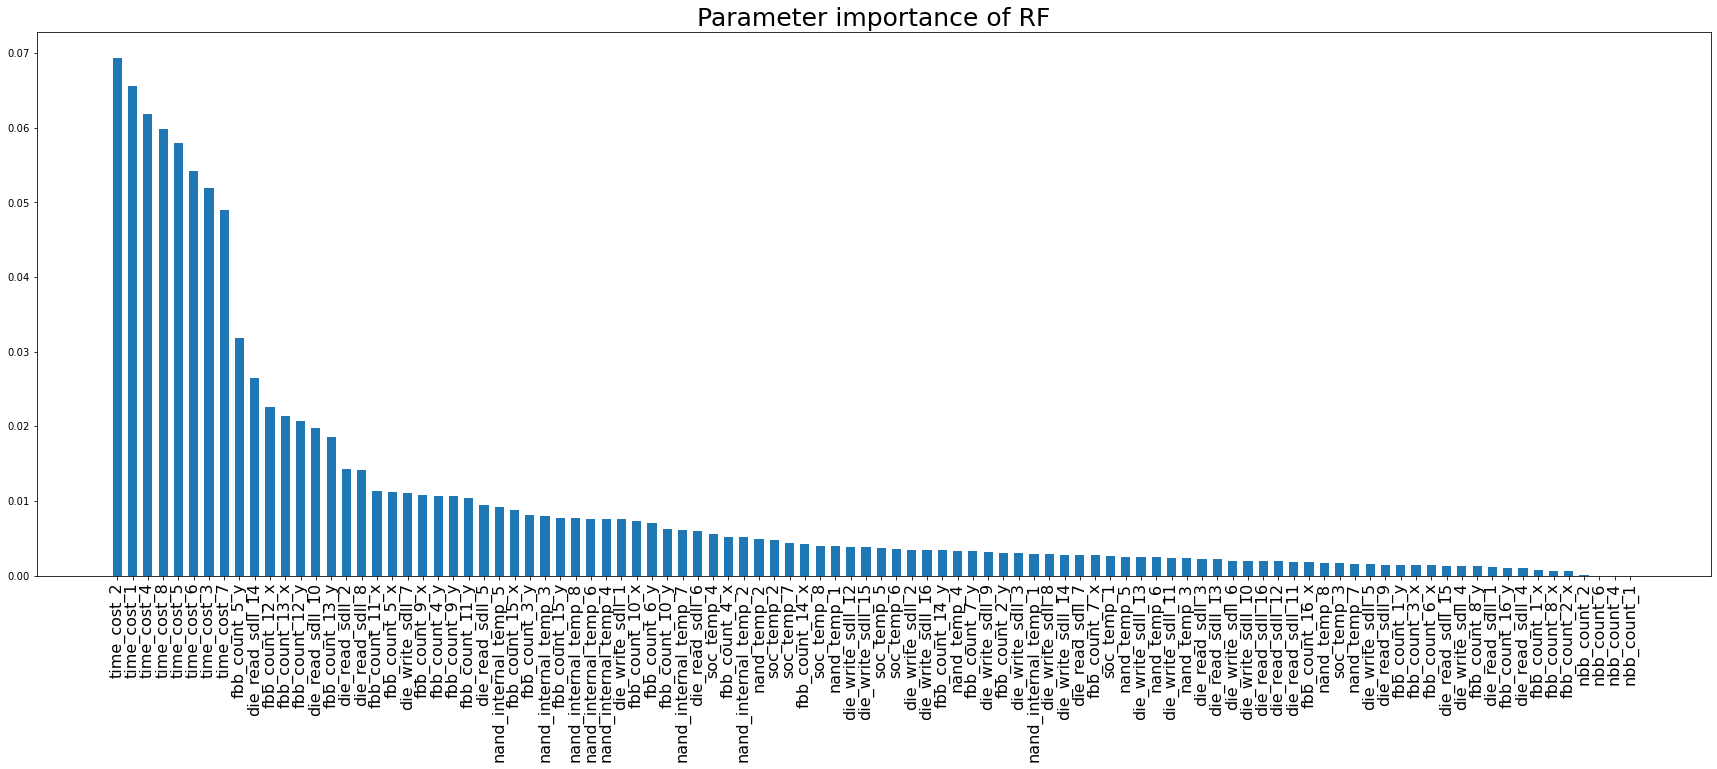

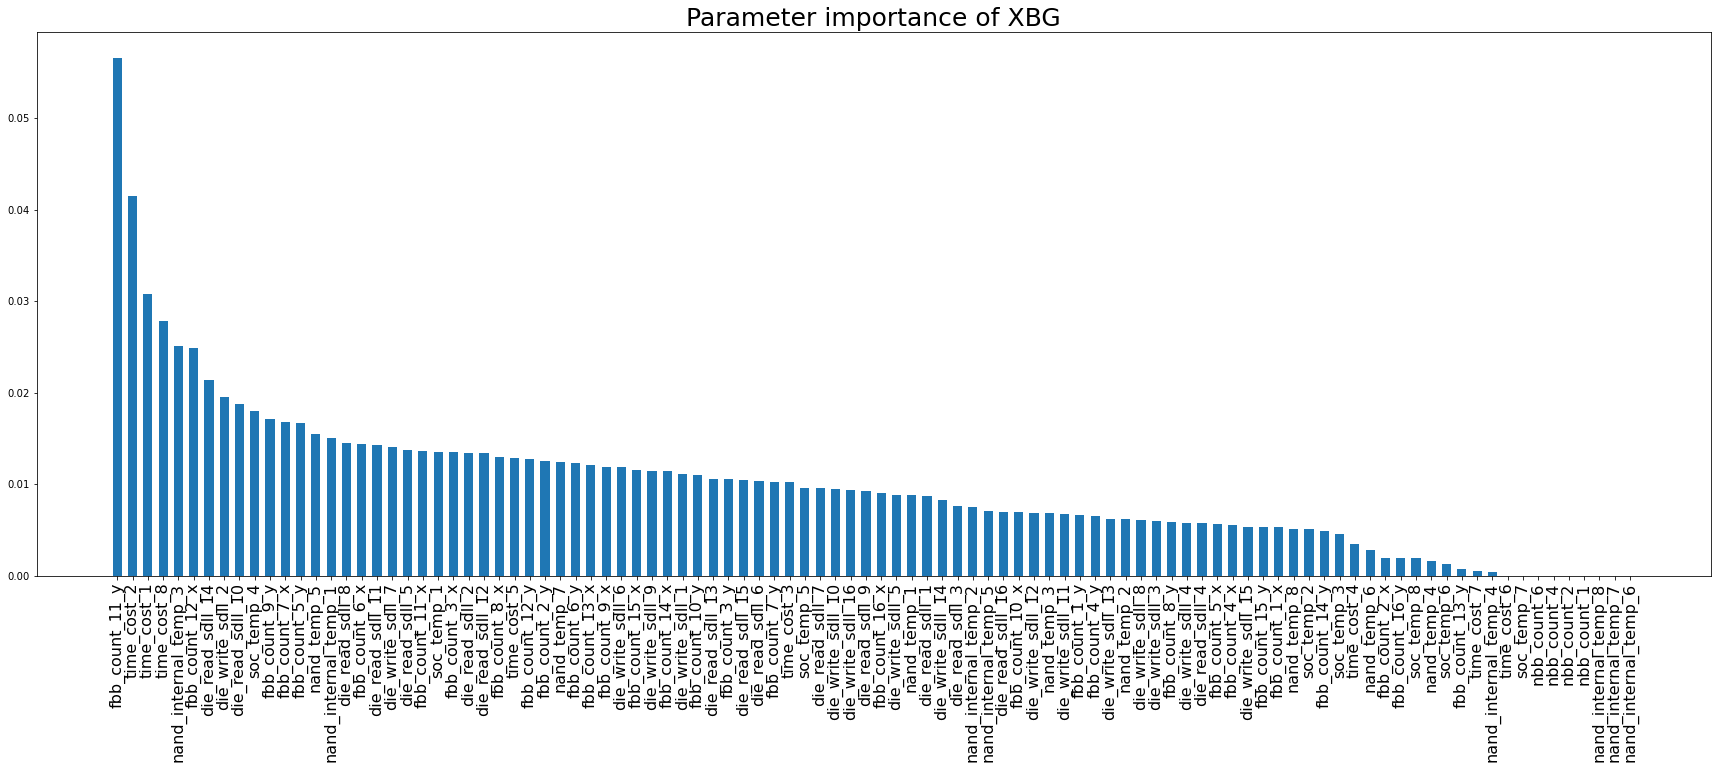

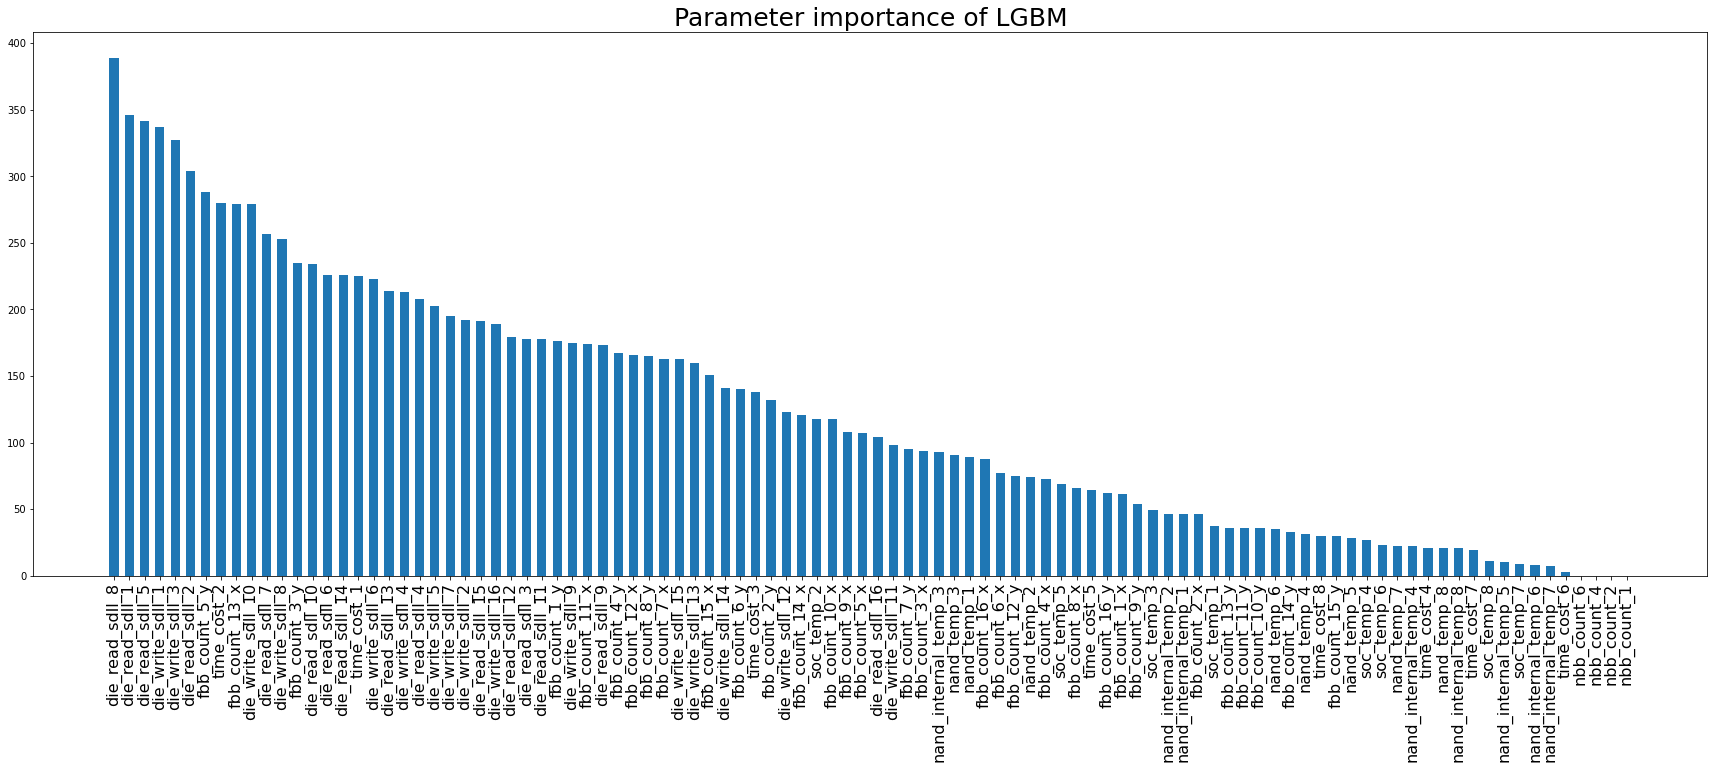

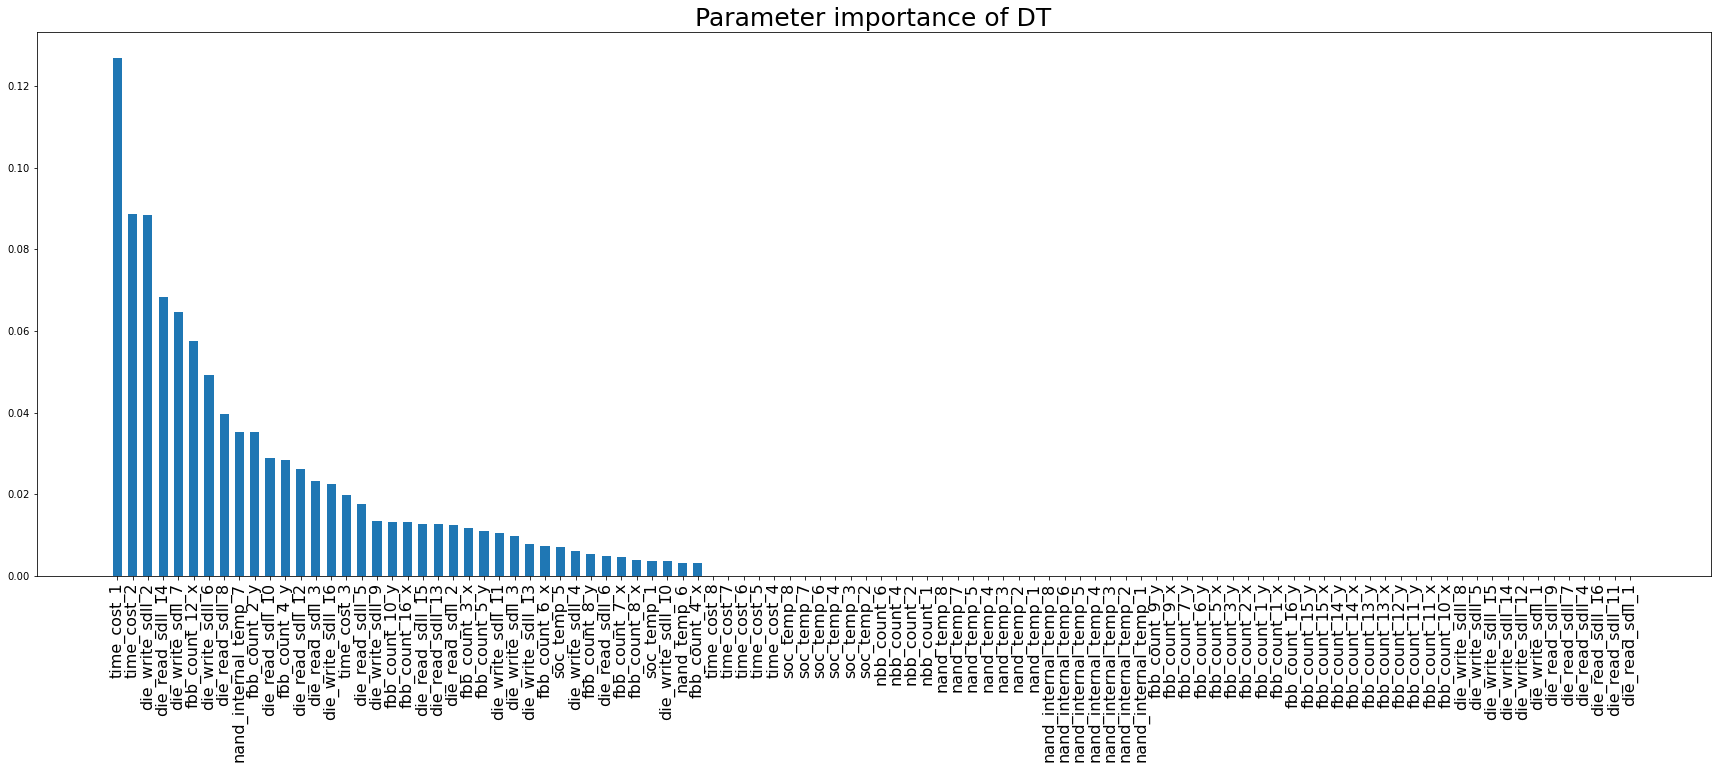

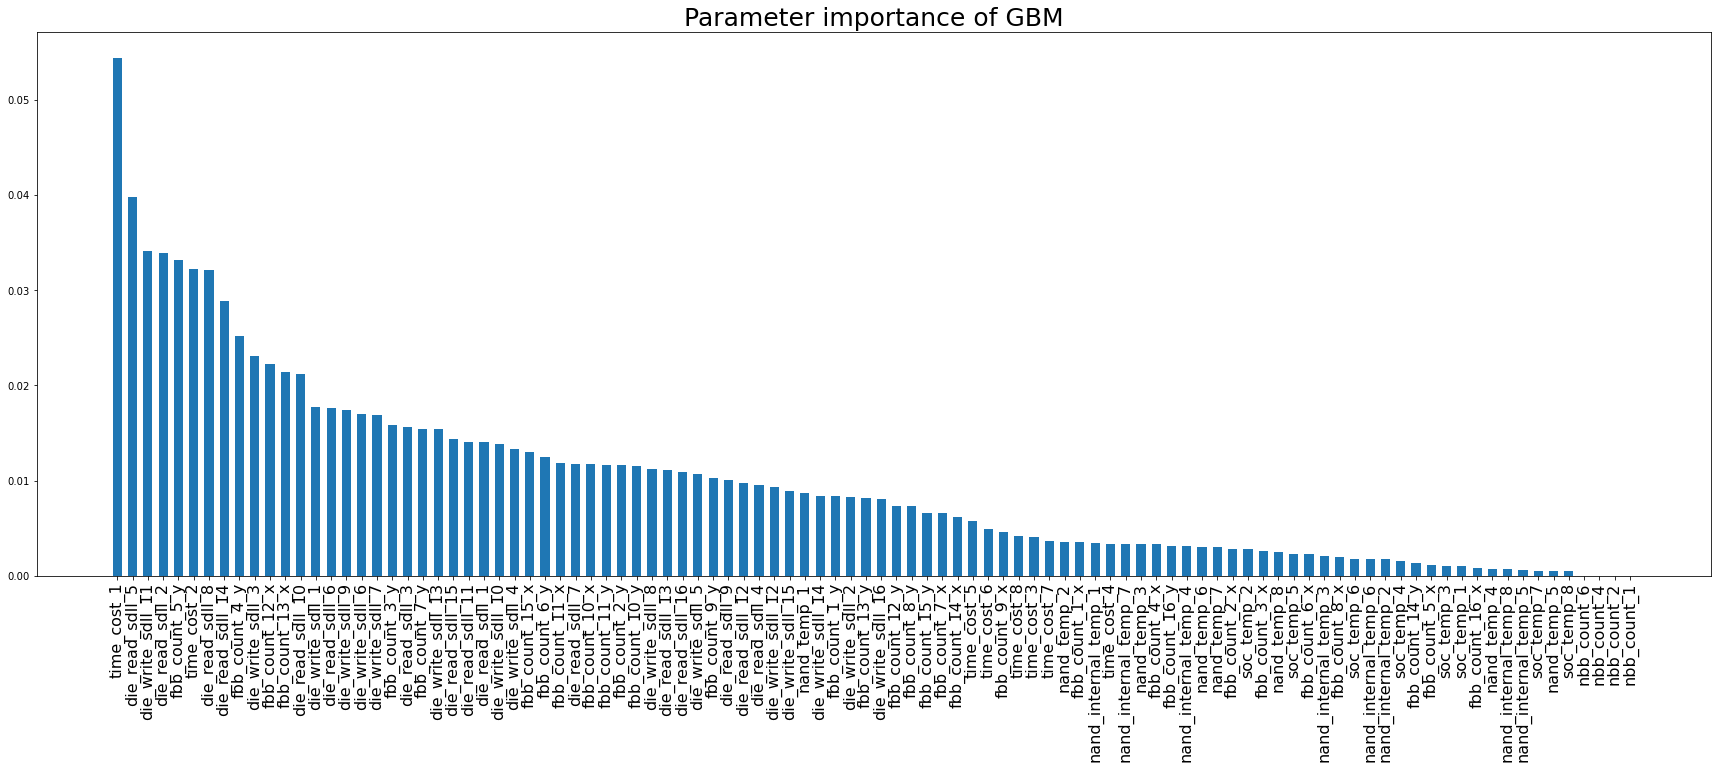

In [32]:
names.remove('LR')
names.remove('SVC')
models.remove(LR)
models.remove(svc)

for name, model in zip(names, models):
    Z = zip(model.feature_importances_,namelst)  # 对AB进行封装，把频率放在前面
    Z = sorted(Z, reverse=True)  # 进行逆序排列
    importance_sorted, namelst_sorted = zip(*Z)  # 进行解压，其中的AB已经按照频率排好

    plt.figure(figsize=(30,10))
    plt.bar(namelst_sorted,importance_sorted,width=0.6)
    plt.xticks(rotation=90,fontsize=16)
    plt.title('Parameter importance of '+name,fontsize = 25)
    plt.show()

In [31]:
for name, model in zip(names, models):
    print(name)
    print('Train:')
    print(confusion_matrix(y_train,model.predict(x_train)))
    print('Test:')
    print(confusion_matrix(y_test,model.predict(x_test)))
    print('Verified:')
    print(confusion_matrix(y_verify,model.predict(x_verify)))

ABC
Train:
[[815   1]
 [  1 818]]
Test:
[[202   4]
 [139  64]]
Verified:
[[25  1]
 [27  0]]
RF
Train:
[[659 157]
 [204 615]]
Test:
[[139  67]
 [ 69 134]]
Verified:
[[18  8]
 [20  7]]
XBG
Train:
[[814   2]
 [  0 819]]
Test:
[[190  16]
 [ 67 136]]
Verified:
[[24  2]
 [24  3]]
LGBM
Train:
[[815   1]
 [  1 818]]
Test:
[[197   9]
 [ 75 128]]
Verified:
[[25  1]
 [26  1]]
LR
Train:
[[556 260]
 [236 583]]
Test:
[[136  70]
 [ 90 113]]
Verified:
[[17  9]
 [13 14]]
SVC
Train:
[[570 246]
 [350 469]]
Test:
[[155  51]
 [115  88]]
Verified:
[[18  8]
 [18  9]]
DT
Train:
[[696 120]
 [ 46 773]]
Test:
[[106 100]
 [ 64 139]]
Verified:
[[16 10]
 [17 10]]
GBM
Train:
[[815   1]
 [  1 818]]
Test:
[[198   8]
 [116  87]]
Verified:
[[26  0]
 [27  0]]
